In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Sample DataFrame (replace this with your actual data)


df=pd.read_csv(r"C:\Users\marat\OneDrive\Desktop\reliance_stock_data.csv")


# Check for NaN values
print(df.isna().sum())

# Remove rows with any NaN values
df = df.dropna()

# If you only want to fill NaN values in specific columns:
df['News'] = df['News'].fillna('No Data')  # For text columns
df['Stock_Price'] = df['Stock_Price'].fillna(df['Stock_Price'].mean())  # For numerical columns

# Check if NaN values are handled
print(df.isna().sum())


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment score using VADER
def calculate_sentiment_score(news):
    if isinstance(news, str):  # Ensure that the input is a string
        scores = analyzer.polarity_scores(news)
        return scores['compound']  # Use 'compound' as the overall sentiment score
    else:
        return None  # Return None for non-string values

# Apply the function to the 'News' column
df['Sentiment Score'] = df['News'].apply(calculate_sentiment_score)

# Display the updated DataFrame
print(df.iloc[0:500,:])

Date           802
Stock_Price    797
News           187
Sentiment      208
dtype: int64
Date           0
Stock_Price    0
News           0
Sentiment      0
dtype: int64
           Date  Stock_Price  \
0    03-01-2017   249.018509   
1    04-01-2017   243.932541   
2    05-01-2017   246.275513   
3    06-01-2017   245.715485   
4    09-01-2017   246.344086   
..          ...          ...   
501  08-01-2019   505.008820   
502  09-01-2019   507.797516   
503  10-01-2019   506.311737   
504  11-01-2019   501.991516   
505  14-01-2019   501.420074   

                                                  News Sentiment  \
0    Get ready for some fund manager churning. Meen...         1   
1    The Financial ExpressBharti Airtel chairman Su...         0   
2    The Financial ExpressReliance Jio has announce...         1   
3    MUMBAI: Reliance Retail is launching stores wh...         1   
4    New Delhi: The volume of wireless broadband da...         0   
..                                   

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from gensim.models import Word2Vec
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize



# Rename columns for consistency
data = df.rename(columns={"title": "News", "sentiment": "Sentiment", "Stock price": "Stock_Price"})
data.head()

csv_file_path = r"E:\reliance_stock_data122.csv"  # You can change the file name and path as needed
data.to_csv(csv_file_path, index=False)  # index=False to exclude row numbers
print(f"Stock data exported successfully to {csv_file_path}")



Stock data exported successfully to E:\reliance_stock_data122.csv


In [19]:
# ------------------------------
# Sentiment Calculation Using VADER

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment score using VADER
def calculate_sentiment_score(news):
    if isinstance(news, str):  # Ensure that the input is a string
        scores = analyzer.polarity_scores(news)
        return scores['compound']  # Use 'compound' as the overall sentiment score
    else:
        return None  # Return None for non-string values

# Apply the function to the 'News' column
df['Sentiment Score'] = df['News'].apply(calculate_sentiment_score)

# Display the updated DataFrame
print(df.iloc[0:500,:])





           Date  Stock_Price  \
0    03-01-2017   249.018509   
1    04-01-2017   243.932541   
2    05-01-2017   246.275513   
3    06-01-2017   245.715485   
4    09-01-2017   246.344086   
..          ...          ...   
501  08-01-2019   505.008820   
502  09-01-2019   507.797516   
503  10-01-2019   506.311737   
504  11-01-2019   501.991516   
505  14-01-2019   501.420074   

                                                  News Sentiment  \
0    Get ready for some fund manager churning. Meen...         1   
1    The Financial ExpressBharti Airtel chairman Su...         0   
2    The Financial ExpressReliance Jio has announce...         1   
3    MUMBAI: Reliance Retail is launching stores wh...         1   
4    New Delhi: The volume of wireless broadband da...         0   
..                                                 ...       ...   
501  Talking to ET Now, Mayuresh Joshi, Fund Manage...         1   
502  The Swiss ski resort Davos is gearing up for t...         1   
503

In [41]:

# ------------------------------
# Text Preprocessing
# ------------------------------
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    # Ensure input text is a string (in case it's mistakenly converted to a float or other types)
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text.lower())
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum()]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        return " ".join(tokens)
    else:
        return ""

# Apply text preprocessing
data['Processed_News'] = data['News'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
data.head()

,Date,Stock_Price,News,Sentiment,Sentiment Score
0,03-01-2017,249.018509,Get ready for some fund manager churning. Meen...,1,0.9774
1,04-01-2017,243.932541,The Financial ExpressBharti Airtel chairman Su...,0,0.9493
2,05-01-2017,246.275513,The Financial ExpressReliance Jio has announce...,1,0.9930
3,06-01-2017,245.715485,MUMBAI: Reliance Retail is launching stores wh...,1,0.9485
4,09-01-2017,246.344086,New Delhi: The volume of wireless broadband da...,0,0.9564


In [21]:
# ------------------------------
# Text Representation
# ------------------------------
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['Processed_News'])
sequences = tokenizer.texts_to_sequences(data['Processed_News'])
news_pad = pad_sequences(sequences, maxlen=20, padding='post')

# Scaling stock prices
scaler = MinMaxScaler()
data['Scaled_Stock_Price'] = scaler.fit_transform(data[['Stock_Price']])



In [22]:
# ------------------------------
# Word2Vec Embedding
# ------------------------------
# Train a Word2Vec model on the processed news
w2v_model = Word2Vec(sentences=data['Processed_News'], vector_size=100, window=5, min_count=1, workers=4)

# Create Word2Vec embeddings for each news entry by averaging word vectors
def get_average_word2vec(tokens, model, vector_size):
    if len(tokens) < 1:
        return np.zeros(vector_size)  # Return a zero vector for empty inputs
    valid_tokens = [token for token in tokens if token in model.wv]
    if not valid_tokens:
        return np.zeros(vector_size)  # Return a zero vector if no tokens are in the model's vocabulary
    return np.mean(model.wv[valid_tokens], axis=0)

data['News_Embedding'] = data['Processed_News'].apply(lambda x: get_average_word2vec(x, w2v_model, 100))

# Convert the list of embeddings to a NumPy array
X_text = np.vstack(data['News_Embedding'].values)

# ------------------------------
# Scaling Stock Prices
# ------------------------------
scaler = MinMaxScaler()
data['Scaled_Stock_Price'] = scaler.fit_transform(data[['Stock_Price']])

In [23]:
# ------------------------------
# Splitting Data
# ------------------------------
X_text = news_pad
X_sentiment = np.array(data['Sentiment Score']).reshape(-1, 1)  # Sentiment Scores from VADER
X_price = np.array(data['Scaled_Stock_Price']).reshape(-1, 1)

# Combine inputs for the LSTM
X_combined = np.hstack([X_text, X_sentiment])
y = X_price

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
print(X_combined)

[[7.890e+02 4.167e+03 6.130e+02 ... 1.530e+02 4.100e+01 9.774e-01]
 [1.200e+01 3.000e+00 2.770e+02 ... 1.040e+02 2.500e+01 9.493e-01]
 [1.200e+01 3.000e+00 2.770e+02 ... 1.040e+02 2.500e+01 9.930e-01]
 ...
 [4.738e+03 2.180e+02 4.100e+01 ... 1.562e+03 2.970e+02 9.963e-01]
 [1.200e+01 3.000e+00 2.770e+02 ... 1.040e+02 2.500e+01 9.995e-01]
 [1.000e+00 7.010e+02 1.514e+03 ... 2.640e+02 1.000e+01 9.989e-01]]


In [24]:
# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

print(X_train)

[[[6.300e+01 7.900e+01 1.418e+03 ... 3.700e+01 4.900e+01 9.835e-01]]

 [[5.300e+01 8.700e+01 1.036e+03 ... 5.300e+01 4.690e+02 9.707e-01]]

 [[1.200e+01 3.000e+00 2.770e+02 ... 1.040e+02 2.500e+01 9.602e-01]]

 ...

 [[1.760e+02 1.887e+03 1.280e+02 ... 1.150e+02 2.390e+02 9.861e-01]]

 [[1.780e+02 2.250e+02 2.500e+01 ... 3.150e+02 5.480e+02 9.835e-01]]

 [[2.570e+02 3.850e+02 6.240e+02 ... 3.850e+02 4.760e+02 9.653e-01]]]


In [25]:



# ------------------------------
# LSTM Model
# ------------------------------
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

C:\python123\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1828 - val_loss: 0.1126
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0933 - val_loss: 0.0867
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0796 - val_loss: 0.0768
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0697 - val_loss: 0.0714
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0667 - val_loss: 0.0692
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0696 - val_loss: 0.0669
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0694 - val_loss: 0.0665
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0622 - val_loss: 0.0661
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0605 - val_loss: 0.0649
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0583 - val_loss: 0.0647
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0582 - val_loss: 0.0649
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0658 - val_l

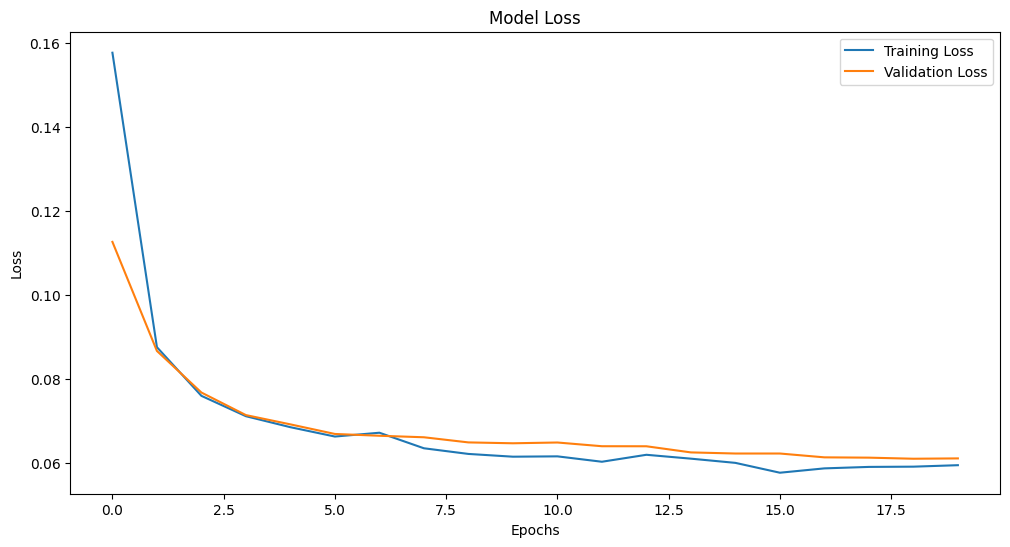

In [26]:

# ------------------------------
# Evaluation
# ------------------------------
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'C:\Users\marat\OneDrive\Desktop\2nd year\project\Epochgraph.png', format='png', dpi=300)
plt.show()



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


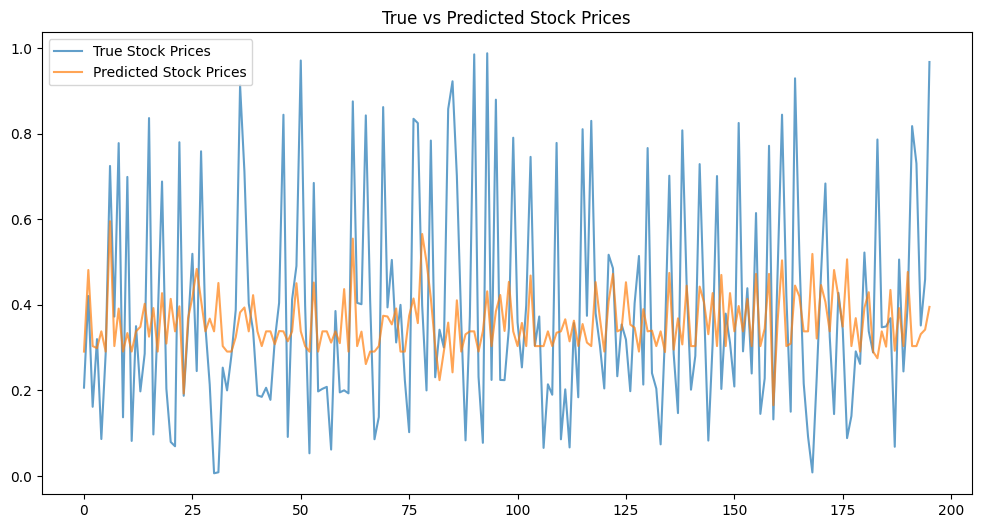

In [37]:
# Predictions


y_pred = model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Stock Prices', alpha=0.7)
plt.plot(y_pred, label='Predicted Stock Prices', alpha=0.7)
plt.title('True vs Predicted Stock Prices')
plt.legend()
plt.savefig(r'C:\Users\marat\OneDrive\Desktop\2nd year\project\Prediction.png', format='png', dpi=300)
plt.show()




In [38]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.061108929675119286
R-squared: 0.04797182021650981


In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load data
# Replace with your data paths
news_data = pd.read_csv(r"C:\Users\marat\Downloads\archive (1)\Reliance_News.csv")  # Assumes news_data has 'sentiment_score' and 'date'
stock_data = pd.read_csv(r"E:\reliance_stock_data.csv")  # Assumes stock_data has 'date', 'close', and 'movement'

# Preprocess stock data
# Create the Movement column
stock_data["Movement"] = (stock_data["Close"].diff() > 0).astype(int)


stock_data.head()

,Date,Close,Movement
0,2017-01-03,249.018509,0
1,2017-01-04,243.932541,0
2,2017-01-05,246.275513,1
3,2017-01-06,245.715485,0
4,2017-01-09,246.344086,1


In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import nltk

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores
news_data["Sentiment_Score"] = news_data["News"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Display the dataframe with sentiment scores
news_data.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Date,News,sentiment,Sentiment_Score
0,2017-01-03,Get ready for some fund manager churning. Meen...,0.0,0.9774
1,2017-01-03,The Financial ExpressBharti Airtel chairman Su...,0.0,0.9134
2,2017-01-04,The Financial ExpressReliance Jio has announce...,1.0,0.9930
3,2017-01-06,MUMBAI: Reliance Retail is launching stores wh...,1.0,0.9477
4,2017-01-06,New Delhi: The volume of wireless broadband da...,0.0,0.9564


In [46]:
# Merge news and stock data
merged_data = pd.merge(news_data, stock_data, on='Date')
merged_data = merged_data.sort_values('Date')

# Feature selection
features = ['Sentiment_Score', 'Close']
X = merged_data[features]
y = merged_data['Movement']

print(merged_data['Movement'].value_counts())


Movement
1    805
0    556
Name: count, dtype: int64


In [47]:

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM
sequence_length = 10  # Use 10 days of data to predict movement
X_sequences = []
y_sequences = []

for i in range(sequence_length, len(X_scaled)):
    X_sequences.append(X_scaled[i-sequence_length:i])
    y_sequences.append(y.values[i])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)
# Count of 1's
count_1 = np.count_nonzero(y_test == 1)

count_0 = np.count_nonzero(y_test == 0)

print(count_1)
print(count_0)
print(X_test)

160
111
[[[0.91991982 0.1991935 ]
  [0.99969932 0.1991935 ]
  [0.9870208  0.1991935 ]
  ...
  [0.99594087 0.21044918]
  [0.96887998 0.21044918]
  [0.99834628 0.2031906 ]]

 [[0.99809572 0.18038499]
  [0.99809572 0.18038499]
  [0.99218241 0.18055667]
  ...
  [0.99879729 0.19679033]
  [0.9771987  0.19679033]
  [0.97499374 0.21143004]]

 [[0.9929341  0.19382314]
  [0.99749436 0.19382314]
  [0.99699323 0.19382314]
  ...
  [0.89225758 0.19382314]
  [0.99789526 0.19382314]
  [0.99834628 0.19382314]]

 ...

 [[0.9905788  0.4079261 ]
  [0.99508895 0.40618504]
  [0.99894763 0.3933354 ]
  ...
  [0.99964921 0.40270293]
  [0.99759459 0.4028991 ]
  [0.99794538 0.41763692]]

 [[0.97113505 0.05413266]
  [0.99493861 0.05413266]
  [0.99428715 0.05413266]
  ...
  [0.98150839 0.05915969]
  [0.98892508 0.07053798]
  [0.98997745 0.0667493 ]]

 [[0.15269356 0.3930657 ]
  [0.93430218 0.40025065]
  [0.05362065 0.41888755]
  ...
  [0.99604109 0.43543996]
  [0.98672012 0.44517528]
  [0.96301679 0.44517528]]]


In [48]:
# Build the LSTM model

from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


class_weight = {0: 1.5, 1: 1}  # Adjust the weight for class 0 to be higher
history =model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weight)


Epoch 1/20


C:\python123\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.5186 - loss: 0.8399 - val_accuracy: 0.4096 - val_loss: 0.6945
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5343 - loss: 0.8329 - val_accuracy: 0.5904 - val_loss: 0.6861
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5887 - loss: 0.8364 - val_accuracy: 0.4576 - val_loss: 0.6947
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5424 - loss: 0.8305 - val_accuracy: 0.6162 - val_loss: 0.6885
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5095 - loss: 0.8313 - val_accuracy: 0.5387 - val_loss: 0.6905
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5542 - loss: 0.8291 - val_accuracy: 0.5904 - val_loss: 0.6881
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5644 - loss: 0.8173 - val_accuracy: 0.5314 - val_loss: 0.6898
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5559 - loss: 0.8295 - val_accuracy: 0.5055 - val_loss: 0.

In [49]:
# Evaluate the model
eval_loss, eval_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_loss}, Test Accuracy: {eval_accuracy}")



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5345 - loss: 0.6861 
Test Loss: 0.6804718971252441, Test Accuracy: 0.5571955442428589


In [38]:
# Save the model
model.save('stock_movement_lstm_model.h5')



In [50]:
# Predict
y_pred = (model.predict(X_test) > 0.5).astype(int)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step 


In [40]:
count_1 = np.count_nonzero(y_pred == 1)

count_0 = np.count_nonzero(y_pred == 0)

print(count_1)
print(count_0)

99
172


In [51]:
# Predict
y_pred = (model.predict(X_test) > 0.5).astype(int)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Confusion Matrix:
[[ 51  60]
 [ 60 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       111
           1       0.62      0.62      0.62       160

    accuracy                           0.56       271
   macro avg       0.54      0.54      0.54       271
weighted avg       0.56      0.56      0.56       271

Accuracy: 0.5571955719557196
Precision: 0.625
Recall: 0.625
F1 Score: 0.625


In [183]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_probs = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred_probs)
print(f"AUC: {auc}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
AUC: 0.5199891067538126


In [18]:
from sklearn.model_selection import TimeSeriesSplit

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM
sequence_length = 10  # Use 10 days of data to predict movement
X_sequences = []
y_sequences = []

for i in range(sequence_length, len(X_scaled)):
    X_sequences.append(X_scaled[i-sequence_length:i])
    y_sequences.append(y.values[i])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # 5 splits for time series cross-validation

for train_index, val_index in tscv.split(X_sequences):
    X_train, X_val = X_sequences[train_index], X_sequences[val_index]
    y_train, y_val = y_sequences[train_index], y_sequences[val_index]

    # Build and compile your model
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate the model on the validation set
    eval_loss, eval_accuracy = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {eval_loss}, Validation Accuracy: {eval_accuracy}")
    


C:\python123\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.5615 - loss: 0.6895 - val_accuracy: 0.5822 - val_loss: 0.6802
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6256 - loss: 0.6682 - val_accuracy: 0.5822 - val_loss: 0.6908
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5614 - loss: 0.7055 - val_accuracy: 0.5822 - val_loss: 0.6803
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5832 - loss: 0.6815 - val_accuracy: 0.5822 - val_loss: 0.6808
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5856 - loss: 0.6792 - val_accuracy: 0.5822 - val_loss: 0.6805
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6050 - loss: 0.6745 - val_accuracy: 0.5822 - val_loss: 0.6808
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6132 - loss: 0.6698 - val_accuracy: 0.5822 - val_loss: 0.6856
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6027 - loss: 0.6721 - val_accuracy: 0.5822 - val_loss: 0.6907

In [19]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming X and y are already defined (e.g., your feature matrix and target variable)
# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM
sequence_length = 10  # Use 10 days of data to predict movement
X_sequences = []
y_sequences = []

for i in range(sequence_length, len(X_scaled)):
    X_sequences.append(X_scaled[i - sequence_length:i])
    y_sequences.append(y.values[i])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)
splits = list(tscv.split(X_sequences))

# Second iteration (index 1 in splits)
train_index, val_index = splits[1]
X_train, X_val = X_sequences[train_index], X_sequences[val_index]
y_train, y_val = y_sequences[train_index], y_sequences[val_index]

# Build and compile the model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
eval_loss, eval_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {eval_loss}, Validation Accuracy: {eval_accuracy}")


Epoch 1/20


C:\python123\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5670 - loss: 0.6845 - val_accuracy: 0.6533 - val_loss: 0.6499
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5989 - loss: 0.6748 - val_accuracy: 0.6533 - val_loss: 0.6505
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6011 - loss: 0.6742 - val_accuracy: 0.6533 - val_loss: 0.6529
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5951 - loss: 0.6746 - val_accuracy: 0.6533 - val_loss: 0.6487
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6189 - loss: 0.6687 - val_accuracy: 0.6533 - val_loss: 0.6505
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6050 - loss: 0.6727 - val_accuracy: 0.6533 - val_loss: 0.6531
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5782 - loss: 0.6783 - val_accuracy: 0.6533 - val_loss: 0.6461
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5917 - loss: 0.6797 - val_accuracy: 0.6533 - val_loss: 0.

In [20]:
# Predict
y_pred = (model.predict(X_test) > 0.5).astype(int)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step 
Confusion Matrix:
[[  0 111]
 [  0 160]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.59      1.00      0.74       160

    accuracy                           0.59       271
   macro avg       0.30      0.50      0.37       271
weighted avg       0.35      0.59      0.44       271

Accuracy: 0.5904059040590406
Precision: 0.5904059040590406
Recall: 1.0
F1 Score: 0.7424593967517401


C:\python123\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\python123\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\python123\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
